In [1]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

from plots import loadModel

setGPU: Setting GPU to: 0


# Generated image

In [2]:
all_g_weight1 = '../trial37/weights/generator_weights_step_*.h5'
gen_model1 = '../trial37/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [2]:
g_weight3 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'
gen_model3 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [3]:
g = loadModel(gen_model1)
latent_space=100
n_samples = 200
noise = np.random.normal(0, 1, (n_samples, latent_space))

Using TensorFlow backend.


In [4]:
#gen_model = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
#gen_weights = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1350_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

In [9]:
g_weight1 = '../trial37/weights/generator_weights_step_3975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

In [10]:
g.load_weights(g_weight1)

g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 16, 16, 55)        1458103   
Total params: 1,458,103
Trainable params: 1,457,719
Non-trainable params: 384
_________________________________________________________________


In [11]:
#latent_space=100
#batch_size=128

In [12]:
#noise = np.random.normal(0, 1, (batch_size, latent_space))

In [11]:
sampled_energies = np.random.normal(0, 1, (n_samples, 1))

In [12]:
generator_input = np.multiply(sampled_energies, noise)

In [13]:
generated_images = g.predict(generator_input)

In [6]:
#generated_images[10, :, :, 12].shape

#plt.imshow(generated_images[10, :, :, 12])
#plt.colorbar()
#plt.title("Fake", size=18)

In [14]:
gen_red_z = np.sum(generated_images, axis=3)

In [15]:
gen_red_z_mean = np.mean(gen_red_z, axis=0)

/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


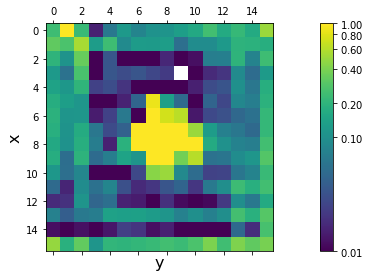

In [16]:
f = plt.figure()
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(gen_red_z_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('y', size=16)
ax.set_ylabel('x', size=16)
f.show()

/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


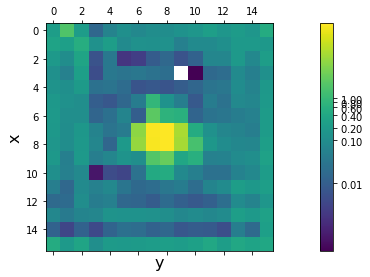

In [17]:
f = plt.figure()
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(gen_red_z_mean, cmap=cm.viridis, norm=LogNorm())
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('y', size=16)
ax.set_ylabel('x', size=16)
f.show()

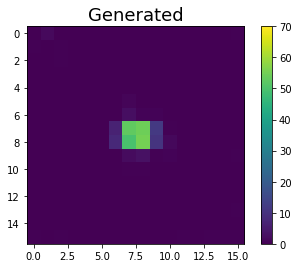

In [18]:
plt.title("Generated", size=18)
plt.imshow(gen_red_z_mean)
plt.colorbar()
plt.clim(0, 70)

/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0.5,1,'Generated')

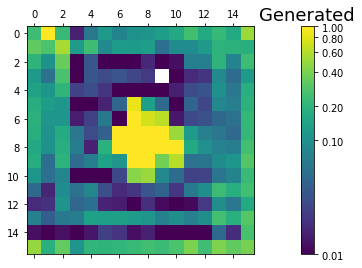

In [34]:
f = plt.figure()
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(gen_red_z_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
#ax.set_xlabel('y', size=16)
#ax.set_ylabel('x', size=16)
f.show()
plt.title("Generated", size=18)

In [13]:
#plt.imshow(gen_red[10, :, :])
#plt.title("Fake", size=18)
#plt.colorbar()

# Real image

In [22]:
#f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
f = h5py.File('/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5', 'r')

X = np.asarray(f['image'])

In [26]:
#np.random.shuffle(X)

In [15]:
#plt.imshow(X[10, :, :, 12])
#plt.title("Real", size=18)
#plt.colorbar()

In [23]:
red_z = np.sum(X, axis=3)
red_z_mean = np.mean(red_z, axis=0)

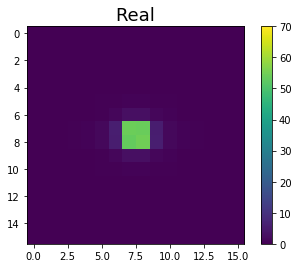

In [24]:
plt.imshow(red_z_mean)
plt.title("Real", size=18)
plt.colorbar()
plt.clim(0, 70)

In [27]:
def redZ(X, ax):
    red_z = np.sum(X, axis=3)
    red_z_mean = np.mean(red_z, axis=0)

    #f = plt.figure()
    #ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
    #axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
    im = ax.matshow(red_z_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
    t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    plt.colorbar(im,  ticks=t, format='$%.2f$')
    ax.set_xlabel(r'$\phi$ bin', size=16)
    ax.set_ylabel(r'$\eta$ bin', size=16)
    #f.show()

Text(0.5,1.05,'Real')

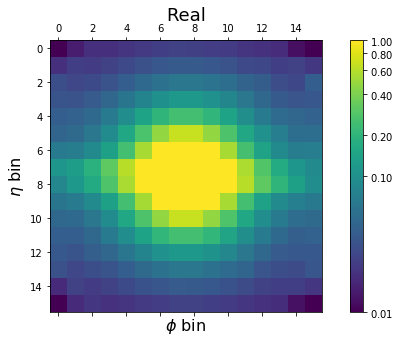

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
redZ(X, ax)
plt.title("Real", size=18)

In [22]:
def redX(X, ax):
    red_x = np.sum(X, axis=1)
    red_x_mean = np.mean(red_x, axis=0)

    #f = plt.figure(figsize=(8, 4))
    #ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
    #axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
    im = ax.matshow(red_x_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
    t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    #f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
    ax.set_xlabel('depth', size=16)
    ax.set_ylabel(r'$\phi$ bin', size=16)
    #f.show()

In [14]:
redX(X, ax)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


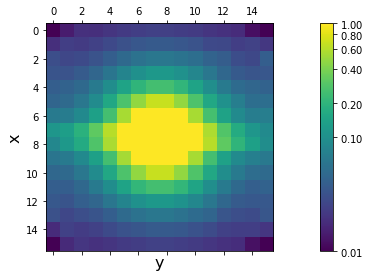

In [18]:
f = plt.figure()
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(red_z_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('y', size=16)
ax.set_ylabel('x', size=16)
f.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


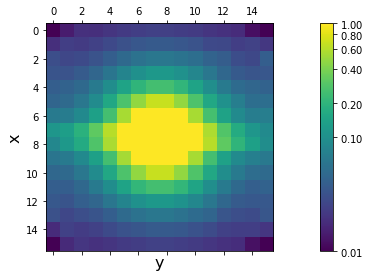

In [19]:
f = plt.figure()
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(red_z_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('y', size=16)
ax.set_ylabel('x', size=16)
f.show()

In [20]:
red_x = np.sum(X, axis=1)
red_x_mean = np.mean(red_x, axis=0)

f = plt.figure(figsize=(8, 4))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(red_x_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('z', size=16)
ax.set_ylabel('y', size=16)
f.show()

In [25]:
def redY(X, ax):
    red_y = np.sum(X, axis=2)
    red_y_mean = np.mean(red_y, axis=0)

    #f = plt.figure(figsize=(8, 4))
    #ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
    #axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
    im = ax.matshow(red_y_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
    t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    #f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
    ax.set_xlabel('depth', size=16)
    ax.set_ylabel(r'$\eta$ bin', size=16)
    #f.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


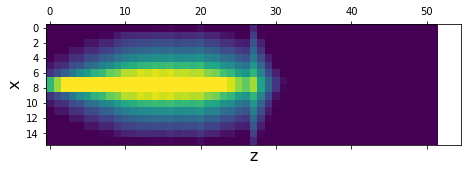

In [39]:
redY(X)

In [22]:
red_y = np.sum(X, axis=2)
red_y_mean = np.mean(red_y, axis=0)

f = plt.figure(figsize=(8, 4))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(red_y_mean, cmap=cm.viridis, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
ax.set_xlabel('z', size=16)
ax.set_ylabel('x', size=16)
f.show()

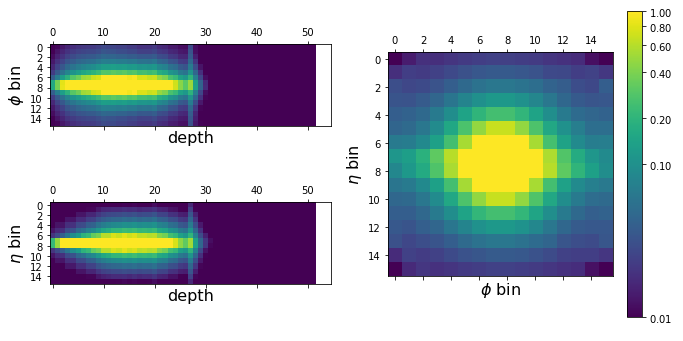

In [26]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)    # The big subplot

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(122)

redX(X, ax1)
redY(X, ax2)
redZ(X, ax3)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

#ax2.get_xaxis().set_visible(False)

plt.tight_layout()

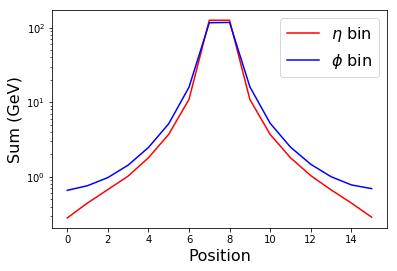

In [27]:
#print(red_mean.shape)
x = np.sum(red_z_mean, axis=1)
y = np.sum(red_z_mean, axis=0)
#print(x, np.mean(x), np.std(x))
#print(y, np.mean(y), np.std(y))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(range(len(x)),x, color='red', label=r'$\eta$ bin')
plt.plot(range(len(y)),y,  color='blue', label=r'$\phi$ bin')
plt.legend(prop={'size': 16})
ax.set_yscale('log')

plt.xlabel('Position', size=16)
plt.ylabel('Sum (GeV)', size=16)
plt.show()